**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

MATRICULA / NOMBRE
* A00466615 Manuel Alejandro de Luis López
* A01796049 Edgar Mendoza Martínez
* A01796032 Francisco Javier Salgado Acevedo
* A01795975 Diego Andrés Bernal Díaz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [ ]:
# Se remueven las vairables del dataframe: id, VIN, url, image_url, description, posting_date, lat, long
cars_df = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'])
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
# Almacenar observaciones y columnas en variables
num_observations = cars_df.shape[0]
num_columns = cars_df.shape[1]

In [ ]:
num_observations

426880

In [ ]:
num_columns

18

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron? 6 columnas


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
# Se determina porcentaje de registros NaN por variable
cars_df
df_missing = cars_df.isna()
df_non_missing = df_missing.sum()
df_non_missing
len(cars_df)
df_missing_percentage = (df_non_missing / len(cars_df))*100
df_missing_percentage

region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

In [ ]:
# Se ordenan variables por porcentaje de registros NaN
df_sorted = df_missing_percentage.sort_values()
df_sorted

region            0.000000
price             0.000000
state             0.000000
region_url        0.000000
year              0.282281
transmission      0.598763
fuel              0.705819
odometer          1.030735
model             1.236179
title_status      1.930753
manufacturer      4.133714
type             21.752717
paint_color      30.501078
drive            30.586347
condition        40.785232
cylinders        41.622470
size             71.767476
county          100.000000
dtype: float64

In [ ]:
# Elimina variables que posean el 30% o más de valores perdidos del dataframe original
cars_df = cars_df.dropna(axis=1, thresh=0.70 * num_observations)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?
   * 8.7321964017991 %


In [ ]:
# Se cacula el % de los registros faltantes en las variables restantes
cars_df
df_missing = cars_df.isna()
df_non_missing = df_missing.sum()
df_non_missing
len(cars_df)
df_missing_percentage = (df_non_missing / len(cars_df))*100
df_missing_percentage

region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
state            0.000000
dtype: float64

In [ ]:
# Se ordenan variables por % de registros faltantes
df_sorted = df_missing_percentage.sort_values()
df_sorted

region           0.000000
region_url       0.000000
price            0.000000
state            0.000000
year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
dtype: float64

In [ ]:
# 2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?
cars_df = cars_df.dropna(subset=['manufacturer', 'title_status', 'model', 'odometer', 'fuel', 'transmission', 'year'], how='any')
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          306976 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


In [ ]:
# Porcentaje de registros eliminados
num_observations_after_dropna = cars_df.shape[0]
percentage_removed = (num_observations - num_observations_after_dropna) / num_observations * 100
print("Porcentaje de registros removidos:", percentage_removed)

Porcentaje de registros removidos: 8.7321964017991


In [ ]:
# Se calculan nuevamente los % de registros faltantes
cars_df
df_missing = cars_df.isna()
df_non_missing = df_missing.sum()
df_non_missing
len(cars_df)
df_missing_percentage = (df_non_missing / len(cars_df))*100
df_missing_percentage

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.208201
state            0.000000
dtype: float64

In [ ]:
# Se ordenan variables por % de resgitros NaN
df_sorted = df_missing_percentage.sort_values()
df_sorted

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
state            0.000000
type            21.208201
dtype: float64

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
cars_df['type'].value_counts()

type
sedan          80976
SUV            71578
pickup         40934
truck          32035
other          19442
coupe          17109
hatchback      14998
wagon          10095
van             7518
convertible     6884
mini-van        4553
offroad          549
bus              305
Name: count, dtype: int64

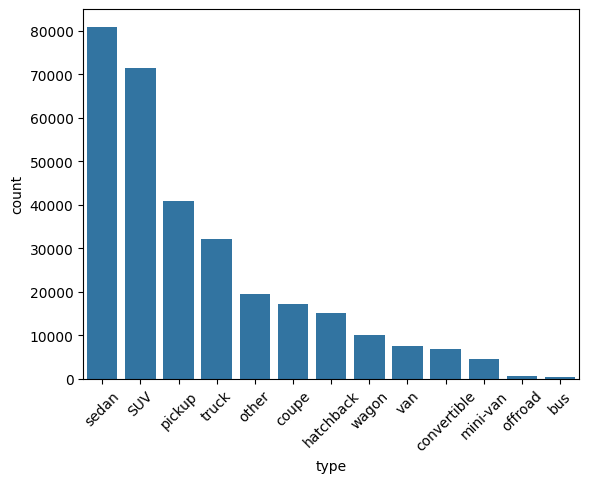

In [ ]:
# prompt: Se crea barchart usuando la variable 'type' ordenando del valor más alto al menor

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="type", data=cars_df, order=cars_df['type'].value_counts().index)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ya que va variable 'type' es de tipo objeto, se rellenan los valores faltantes con la medida de tendencia central Moda
cars_df['type'].fillna(cars_df['type'].mode()[0], inplace=True)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          389604 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


In [ ]:
# Se realiza cálculo nuevamente de porcentajes de valores faltantes para asegurar que ya no exista ninguno
cars_df
df_missing = cars_df.isna()
df_non_missing = df_missing.sum()
df_non_missing
len(cars_df)
df_missing_percentage = (df_non_missing / len(cars_df))*100
df_missing_percentage

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [ ]:
cars_df['price'].value_counts()

price
0        28576
6995      3000
7995      2929
8995      2665
9995      2637
         ...  
20147        1
22962        1
12017        1
21298        1
19853        1
Name: count, Length: 14679, dtype: int64

In [ ]:
cars_df['year'].value_counts()

year
2018.0    34427
2017.0    34128
2015.0    29123
2013.0    28334
2014.0    28048
          ...  
1921.0        1
1915.0        1
1905.0        1
1918.0        1
1945.0        1
Name: count, Length: 107, dtype: int64

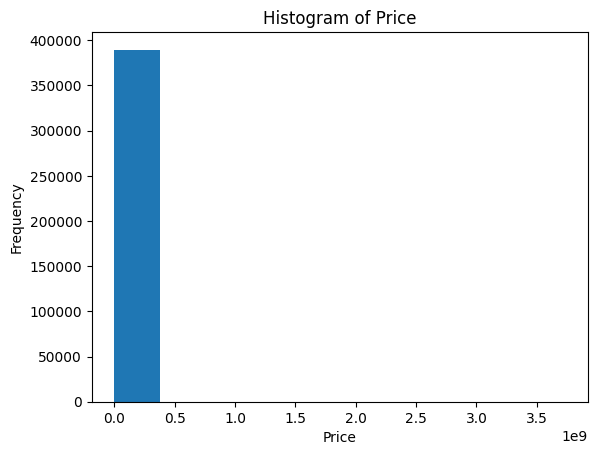

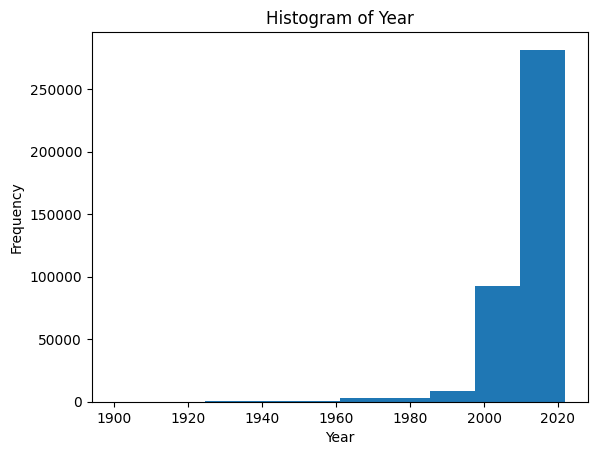

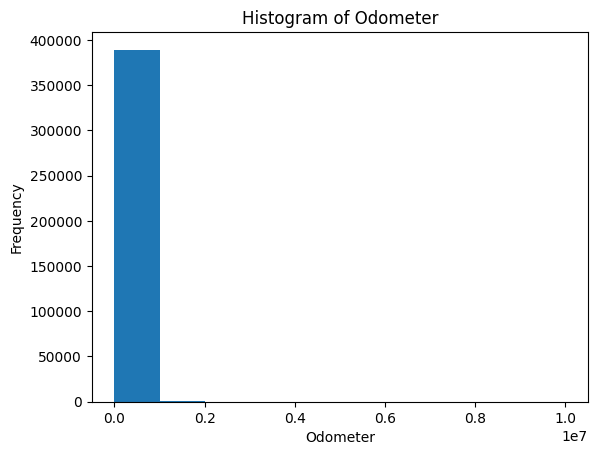

In [ ]:
# Se crea un histograma para las variables price, year y odometer

# Histogram for price
plt.hist(cars_df['price'], bins=10)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

# Histogram for year
plt.hist(cars_df['year'], bins=10)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Histogram of Year")
plt.show()

# Histogram for odometer
plt.hist(cars_df['odometer'], bins=10)
plt.xlabel("Odometer")
plt.ylabel("Frequency")
plt.title("Histogram of Odometer")
plt.show()


3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

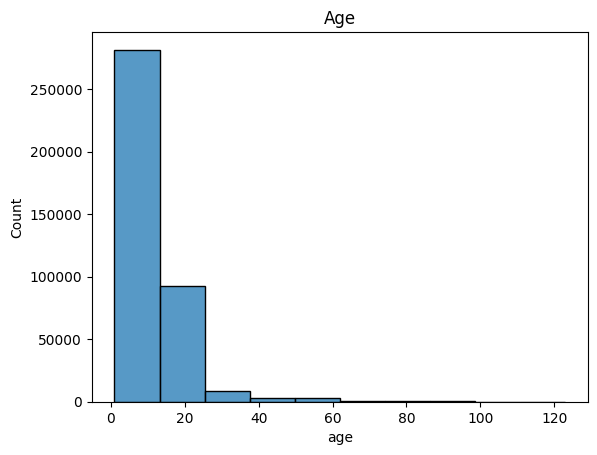

In [ ]:
# Se agrega nueva variable al dataframe con el nombre 'age' para determinar los años del vehículo y se genera histograma de la misma
# Se elimina variable year del dataframe

cars_df['age'] = 2023 - cars_df['year']
cars_df.drop('year', axis=1, inplace=True)

sns.histplot(data=cars_df, x="age", bins=10)
plt.title("Age")
plt.show()

In [ ]:
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,9.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,13.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,3.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,6.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,4.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,3.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,3.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,5.0


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   manufacturer  389604 non-null  object 
 4   model         389604 non-null  object 
 5   fuel          389604 non-null  object 
 6   odometer      389604 non-null  float64
 7   title_status  389604 non-null  object 
 8   transmission  389604 non-null  object 
 9   type          389604 non-null  object 
 10  state         389604 non-null  object 
 11  age           389604 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

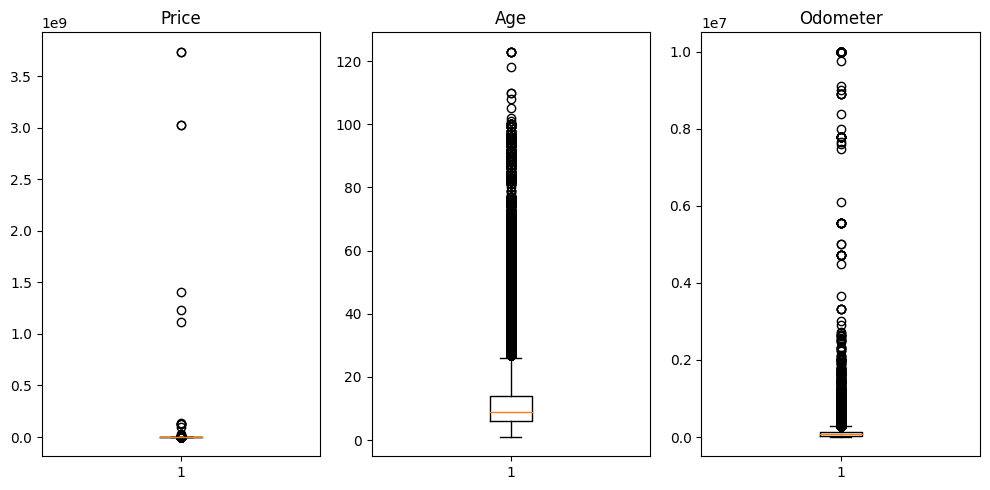

In [ ]:
# Se crean boxplots para las variables price, age, odometer

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.boxplot(cars_df['price'])
plt.title('Price')

plt.subplot(1, 3, 2)
plt.boxplot(cars_df['age'])
plt.title('Age')

plt.subplot(1, 3, 3)
plt.boxplot(cars_df['odometer'])
plt.title('Odometer')

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [ ]:
# Copia del dataframe para manipular
df_clean = cars_df.copy()

# Crear una lista
outlier_percentages = {}

# Eliminar valores atípicos de cada variable numérica
for column in ['price', 'odometer', 'age']:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definimos los límites para considerar un valor como atípico
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los valores atípicos
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df_clean)) * 100
    outlier_percentages[column] = outlier_percentage

    # Eliminamos los valores atípicos del DataFrame
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Calculamos el porcentaje de registros eliminados
initial_records = len(cars_df)
final_records = len(df_clean)
records_removed = ((initial_records - final_records) / initial_records) * 100

# Mostrar los resultados
print("Porcentaje de valores atípicos por variable:", outlier_percentages)
print("Porcentaje de registros eliminados del DataFrame:", records_removed)


Porcentaje de valores atípicos por variable: {'price': 1.7084013511154916, 'odometer': 0.8317056101611706, 'age': 3.532466301351106}
Porcentaje de registros eliminados del DataFrame: 5.969137893861459


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

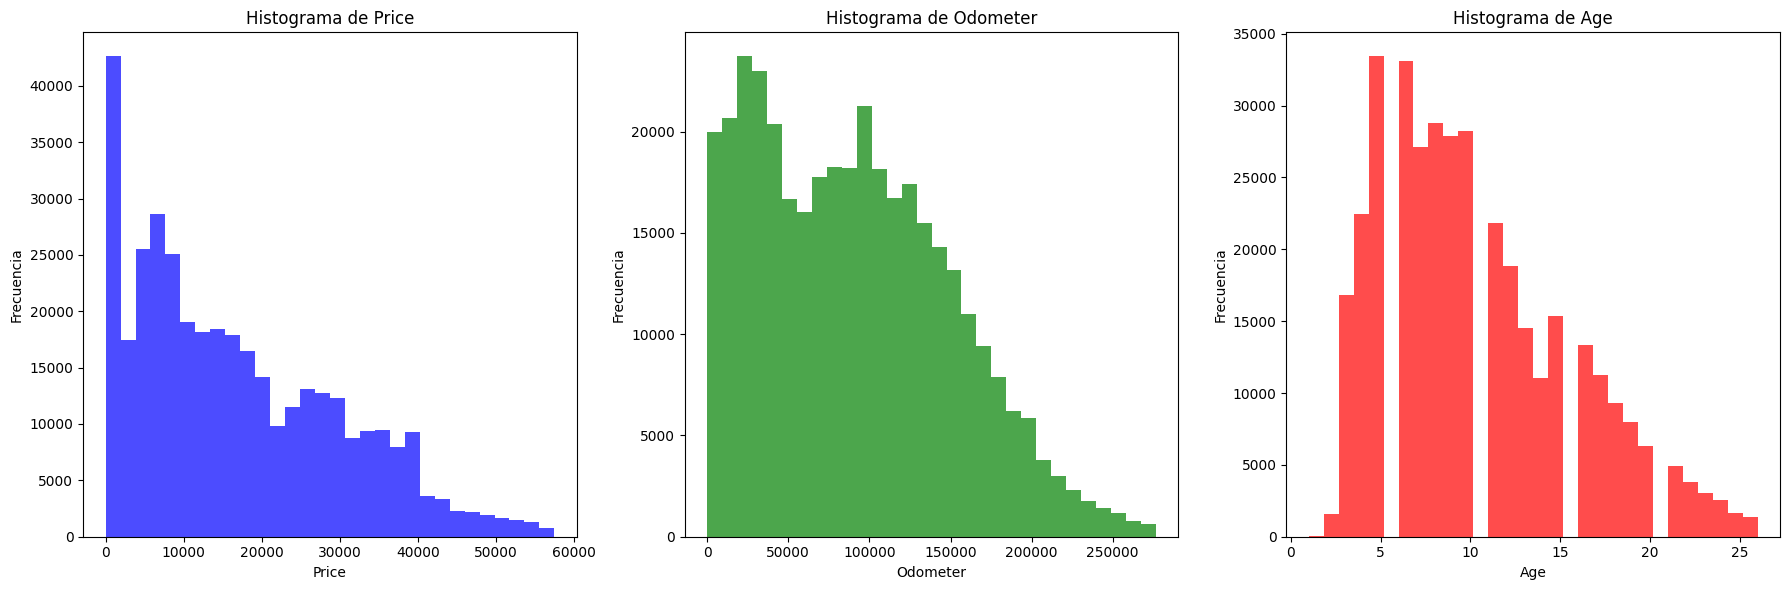

In [ ]:

# Histogramas para las variables price, odometer, y age
plt.figure(figsize=(18, 6))

# Histograma para 'price'
plt.subplot(1, 3, 1)
plt.hist(df_clean['price'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Histograma para 'odometer'
plt.subplot(1, 3, 2)
plt.hist(df_clean['odometer'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frecuencia')

# Histograma para 'age'
plt.subplot(1, 3, 3)
plt.hist(df_clean['age'], bins=30, color='red', alpha=0.7)
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


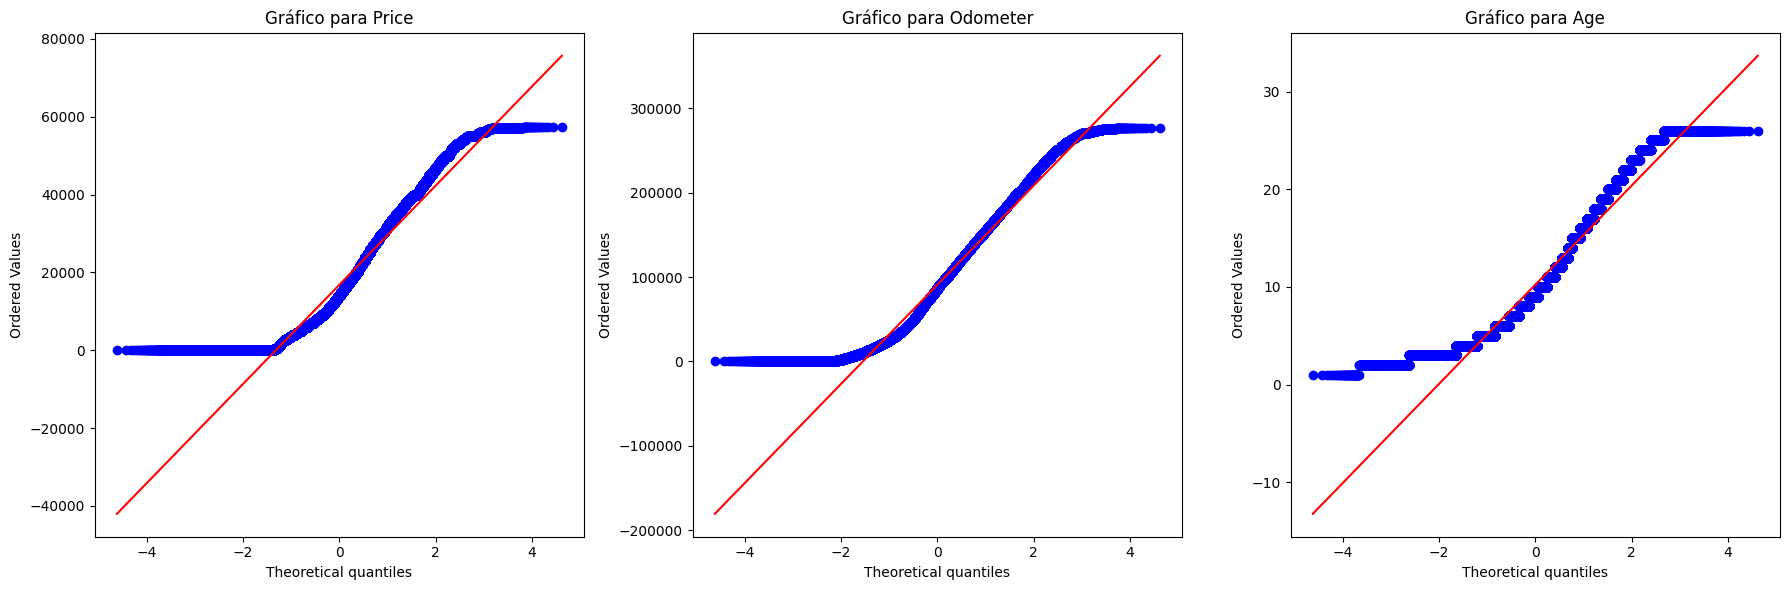

In [ ]:

# Configurar los gráficos Q-Q para las variables
plt.figure(figsize=(18, 6))

# Gráfico para 'price'
plt.subplot(1, 3, 1)
stats.probplot(df_clean['price'], dist="norm", plot=plt)
plt.title('Gráfico para Price')

# Gráfico para 'odometer'
plt.subplot(1, 3, 2)
stats.probplot(df_clean['odometer'], dist="norm", plot=plt)
plt.title('Gráfico para Odometer')

# Gráfico para 'age'
plt.subplot(1, 3, 3)
stats.probplot(df_clean['age'], dist="norm", plot=plt)
plt.title('Gráfico para Age')

plt.tight_layout()
plt.show()


**Análisis de los Gráficos:**

Price: El gráfico Q-Q muestra una desviación significativa de la línea roja en los extremos, indicando una distribución con colas pesadas o outliers, especialmente en valores más altos.

Odometer: Similar a price, el gráfico muestra una desviación en los extremos, indicando que los valores muy altos o muy bajos no siguen una distribución normal. Esto podría indicar el envejecimiento del vehículo o vehículos con muy alto o bajo uso.

Age: Este gráfico muestra una alineación más cercana a la línea teórica en el centro, pero aún presenta algunas desviaciones en los extremos. Esto puede sugerir una moderada desviación de la normalidad, probablemente debido a una concentración de vehículos de ciertas edades.

Dado que ninguna de las variables sigue perfectamente una distribución normal, puede tener implicaciones para análisis que asumen normalidad.

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Hacer una copia del DataFrame
transf_df = df_clean.copy()

# Seleccionar las columnas
columns_to_transform = ['price', 'odometer', 'age']

# Método 'yeo-johnson'
pt = PowerTransformer(method='yeo-johnson')
transf_df[columns_to_transform] = pt.fit_transform(transf_df[columns_to_transform])

# Muestra los primeros registros
print(transf_df.head())



    region                     region_url     price manufacturer  \
27  auburn  https://auburn.craigslist.org  1.110868          gmc   
28  auburn  https://auburn.craigslist.org  0.601185    chevrolet   
29  auburn  https://auburn.craigslist.org  1.348513    chevrolet   
30  auburn  https://auburn.craigslist.org  1.000298       toyota   
31  auburn  https://auburn.craigslist.org  0.157922         ford   

                       model fuel  odometer title_status transmission    type  \
27  sierra 1500 crew cab slt  gas -0.375323        clean        other  pickup   
28            silverado 1500  gas -0.136928        clean        other  pickup   
29       silverado 1500 crew  gas -1.288991        clean        other  pickup   
30      tundra double cab sr  gas -0.717106        clean        other  pickup   
31                 f-150 xlt  gas  0.699383        clean    automatic   truck   

   state       age  
27    al -0.037821  
28    al  0.683758  
29    al -1.873823  
30    al -0.774375  

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

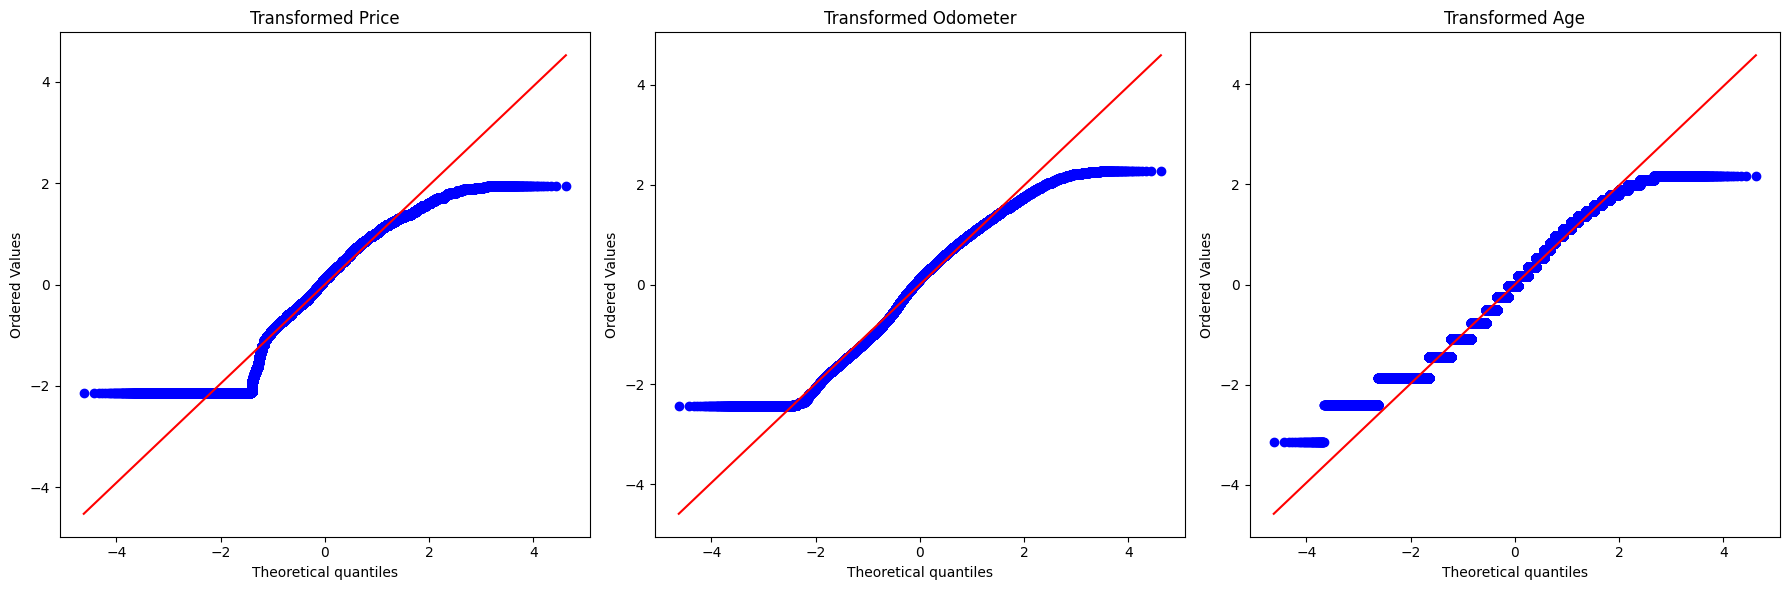

In [ ]:
# Configuración de los gráficos
plt.figure(figsize=(18, 6))

# Plot 'price'
plt.subplot(1, 3, 1)
stats.probplot(transf_df['price'], dist="norm", plot=plt)
plt.title('Transformed Price')

# Plot 'odometer'
plt.subplot(1, 3, 2)
stats.probplot(transf_df['odometer'], dist="norm", plot=plt)
plt.title('Transformed Odometer')

# Plot 'age'
plt.subplot(1, 3, 3)
stats.probplot(transf_df['age'], dist="norm", plot=plt)
plt.title('Transformed Age')

plt.tight_layout()
plt.show()

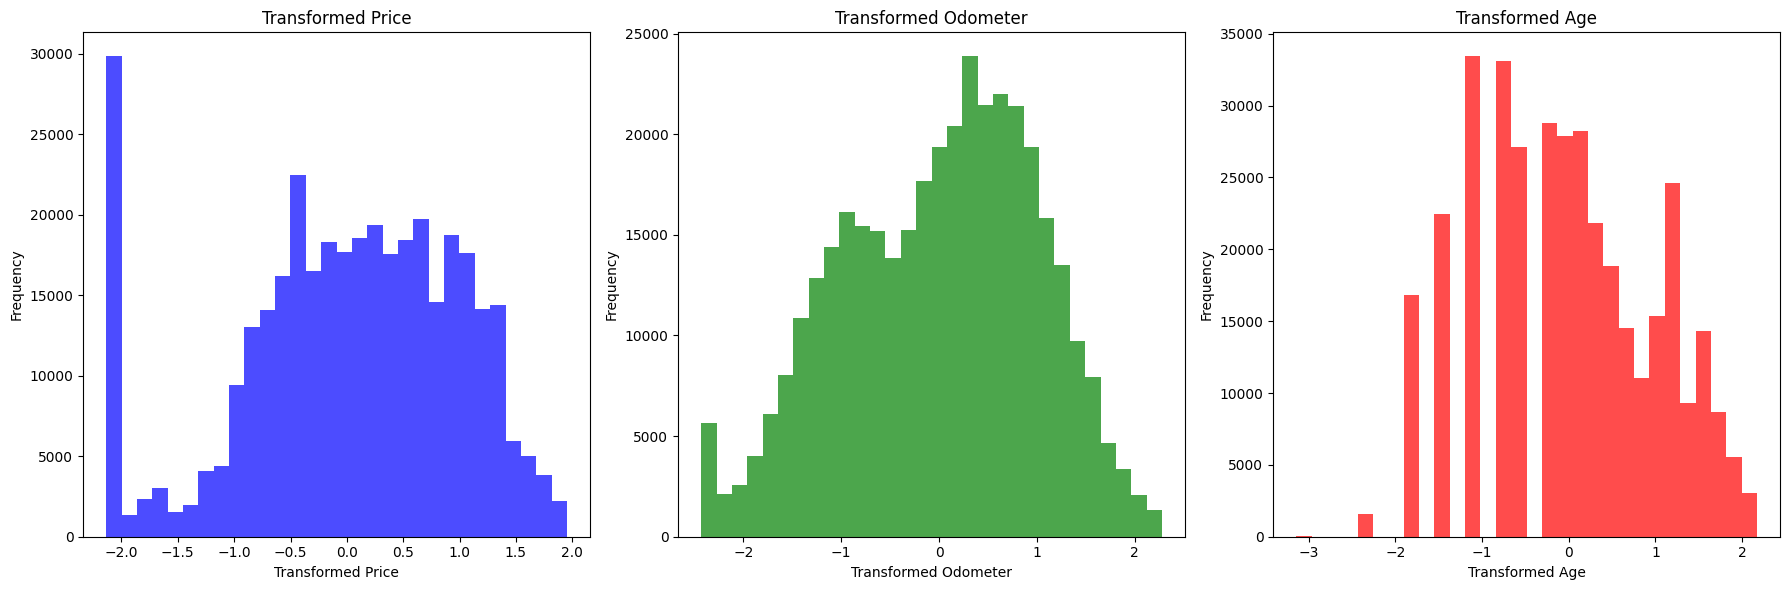

In [ ]:
# Configuración de los gráficos
plt.figure(figsize=(18, 6))

# Histograma'price'
plt.subplot(1, 3, 1)
plt.hist(transf_df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Transformed Price')
plt.xlabel('Transformed Price')
plt.ylabel('Frequency')

# Histograma'odometer'
plt.subplot(1, 3, 2)
plt.hist(transf_df['odometer'], bins=30, color='green', alpha=0.7)
plt.title('Transformed Odometer')
plt.xlabel('Transformed Odometer')
plt.ylabel('Frequency')

# Histograma 'age'
plt.subplot(1, 3, 3)
plt.hist(transf_df['age'], bins=30, color='red', alpha=0.7)
plt.title('Transformed Age')
plt.xlabel('Transformed Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Hacer una copia del DataFrame
minmax_df = transf_df.copy()

# Seleccionar las columnas para escalar
columns_to_scale = ['price', 'odometer', 'age']

# Inicializar y Aplicar el MinMaxScaler para escalar al rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
minmax_df[columns_to_scale] = scaler.fit_transform(minmax_df[columns_to_scale])

# Muestra los primeros registros
print(minmax_df.head())


    region                     region_url     price manufacturer  \
27  auburn  https://auburn.craigslist.org  0.794063          gmc   
28  auburn  https://auburn.craigslist.org  0.669388    chevrolet   
29  auburn  https://auburn.craigslist.org  0.852194    chevrolet   
30  auburn  https://auburn.craigslist.org  0.767017       toyota   
31  auburn  https://auburn.craigslist.org  0.560961         ford   

                       model fuel  odometer title_status transmission    type  \
27  sierra 1500 crew cab slt  gas  0.436584        clean        other  pickup   
28            silverado 1500  gas  0.487199        clean        other  pickup   
29       silverado 1500 crew  gas  0.242601        clean        other  pickup   
30      tundra double cab sr  gas  0.364019        clean        other  pickup   
31                 f-150 xlt  gas  0.664757        clean    automatic   truck   

   state       age  
27    al  0.584581  
28    al  0.720301  
29    al  0.239252  
30    al  0.446044  

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

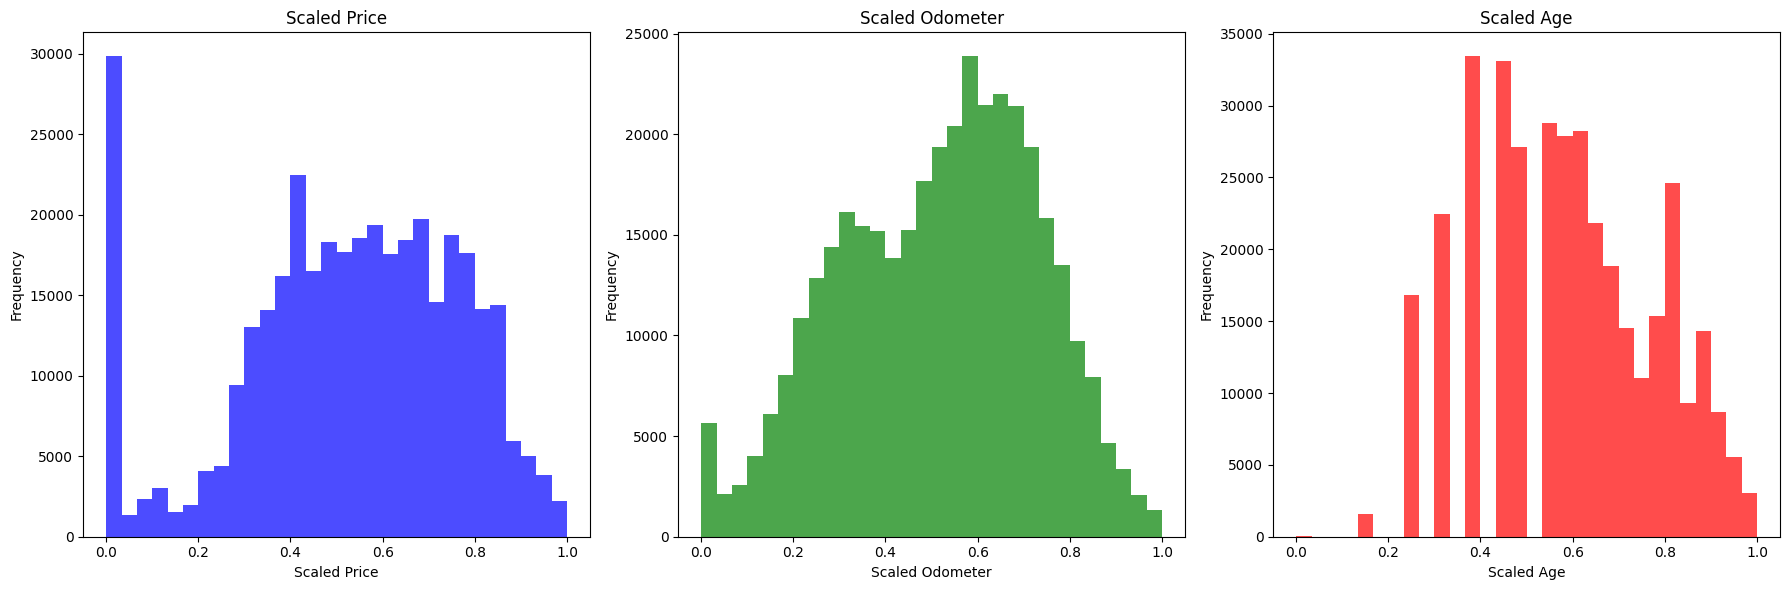

In [ ]:
import matplotlib.pyplot as plt

# Configuración de los histogramas
plt.figure(figsize=(18, 6))

# Histograma para 'price'
plt.subplot(1, 3, 1)
plt.hist(minmax_df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Scaled Price')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')

# Histograma para 'odometer'
plt.subplot(1, 3, 2)
plt.hist(minmax_df['odometer'], bins=30, color='green', alpha=0.7)
plt.title('Scaled Odometer')
plt.xlabel('Scaled Odometer')
plt.ylabel('Frequency')

# Histograma para 'age'
plt.subplot(1, 3, 3)
plt.hist(minmax_df['age'], bins=30, color='red', alpha=0.7)
plt.title('Scaled Age')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
# Resumen estadístico de las variables categóricas en el DataFrame
categorical_summary_cleandf = df_clean.describe(include='object')
categorical_summary_minmaxdf = minmax_df.describe(include='object')

# Imprimir el resumen estadístico de las variables categóricas
print(categorical_summary_cleandf)
print(categorical_summary_minmaxdf)


          region                          region_url manufacturer   model  \
count     366348                              366348       366348  366348   
unique       404                                 413           40   19097   
top     columbus  https://grandrapids.craigslist.org         ford   f-150   
freq        3188                                2739        61661    7436   

          fuel title_status transmission    type   state  
count   366348       366348       366348  366348  366348  
unique       5            6            3      13      51  
top        gas        clean    automatic   sedan      ca  
freq    312095       354736       291648  154262   42062  
          region                          region_url manufacturer   model  \
count     366348                              366348       366348  366348   
unique       404                                 413           40   19097   
top     columbus  https://grandrapids.craigslist.org         ford   f-150   
freq       

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [ ]:
# Umbrales de cardinalidad
high_cardinality_threshold = 100

# Listas para almacenar las variables
highly_cardinal_variables = []
few_cardinal_variables = []

# Clasificar las variables
for column in minmax_df.select_dtypes(include=['object']).columns:
    unique_count = minmax_df[column].nunique()
    if unique_count > high_cardinality_threshold:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

# Imprimir
print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)


Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

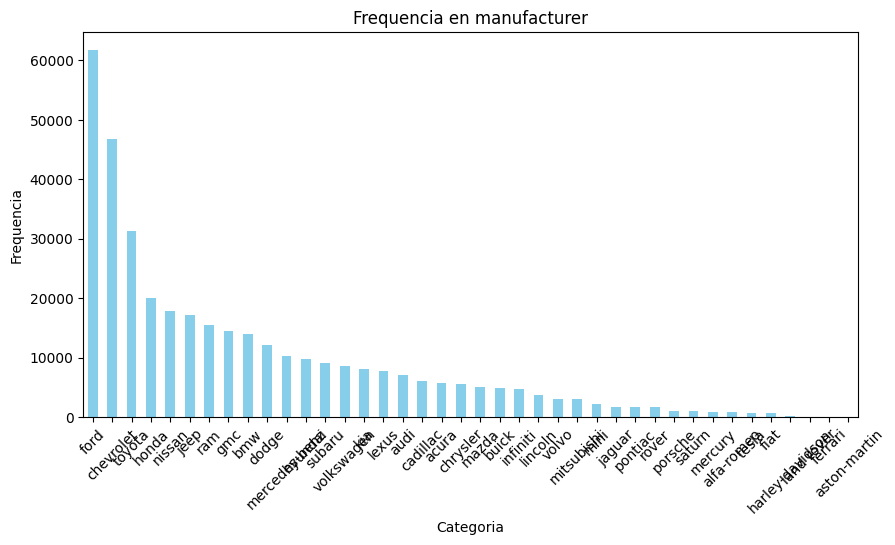

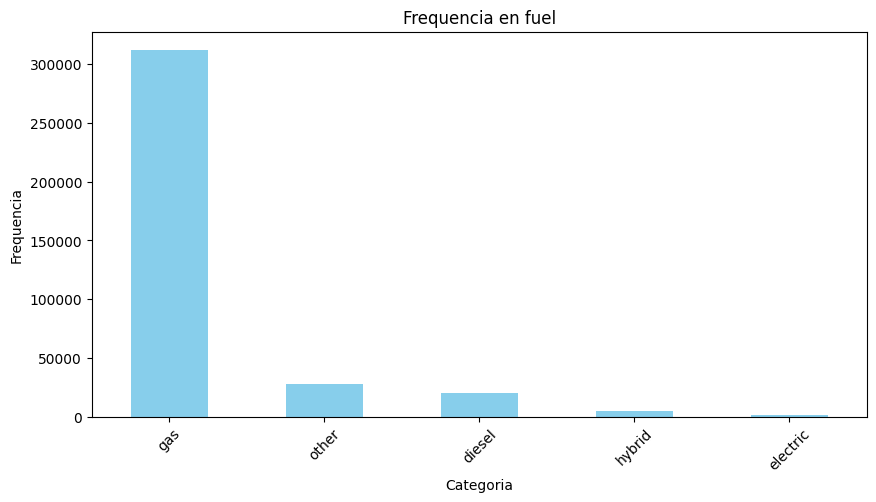

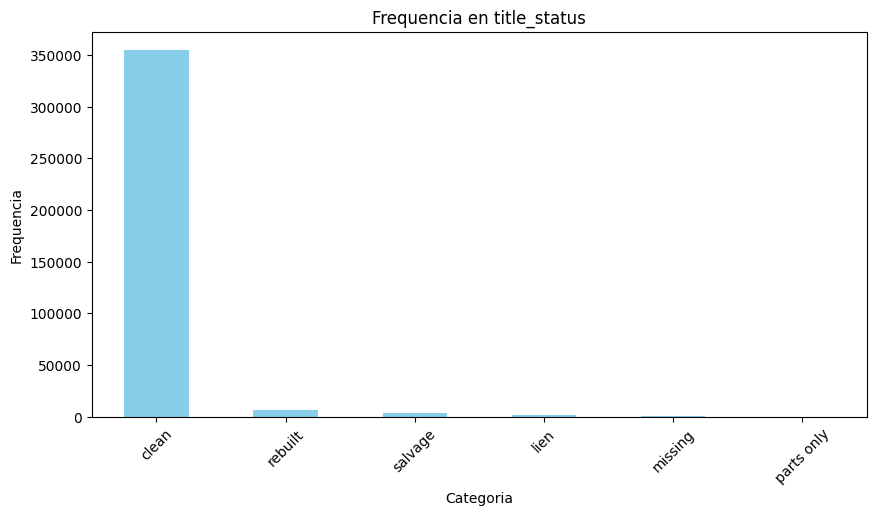

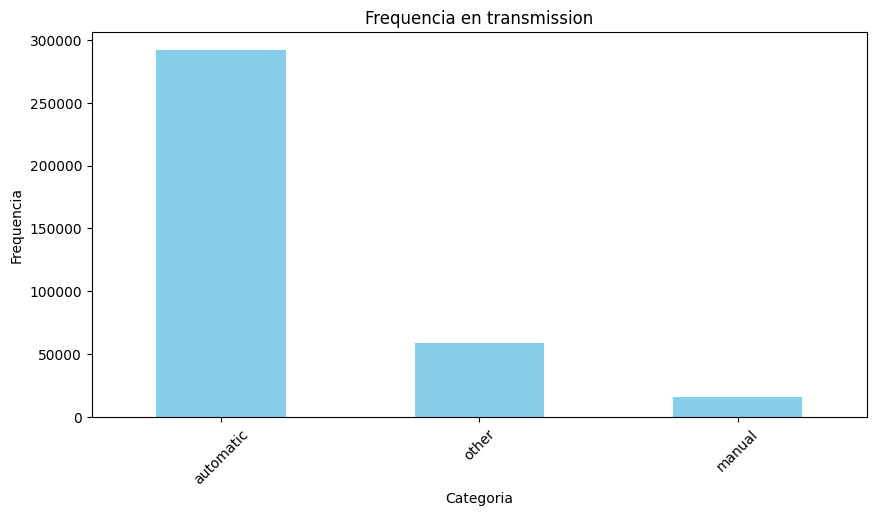

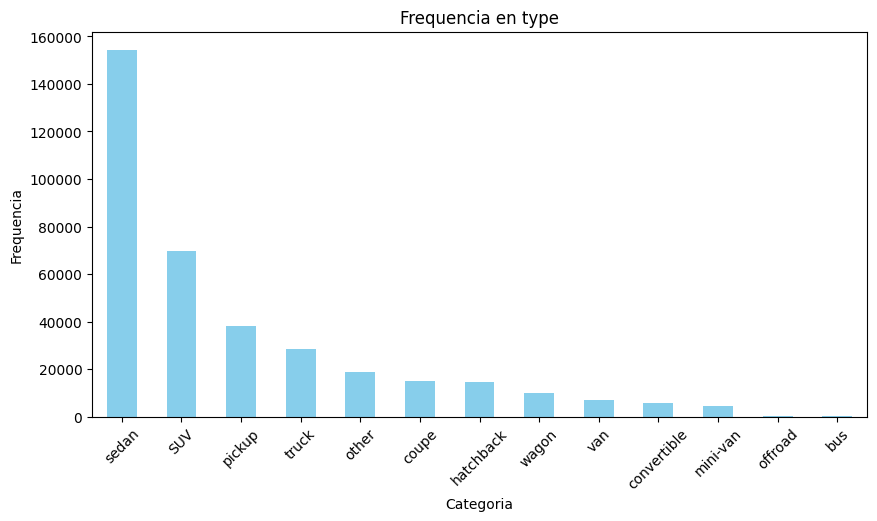

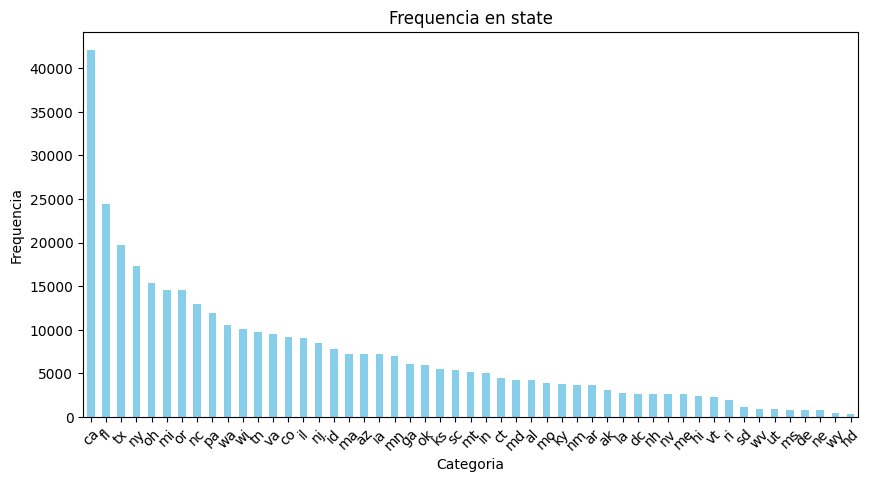

In [ ]:
# Gráficos de barras para cada variable con baja cardinalidad
for column in few_cardinal_variables:
    plt.figure(figsize=(10, 5))
    df_clean[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequencia en {column}')
    plt.xlabel('Categoria')
    plt.ylabel('Frequencia')
    plt.xticks(rotation=45)
    plt.show()


8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# DataFrame solo con las variables de baja cardinalidad
subset_df = df_clean[few_cardinal_variables]

# Inicializar el OneHotEncoder y Codificar
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = encoder.fit_transform(subset_df)

# DataFrame para el resultado codificado
columns = encoder.get_feature_names_out(few_cardinal_variables)
onehot_df = pd.DataFrame(onehot_encoded, columns=columns)

# Mostrar
onehot_df


,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366345,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [ ]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder

# DataFrame con las variables de alta cardinalidad
subset_high_card_df = df_clean[highly_cardinal_variables]

# Inicializar y Aplicar
encoder = BinaryEncoder()
binary_encoded = encoder.fit_transform(subset_high_card_df)

# DataFrame para el resultado
binary_df = pd.DataFrame(binary_encoded, columns=encoder.get_feature_names_out())

# Mostrar
binary_df


,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
# Restablecer los índices
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

# Concatenar DataFrames
concat_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Mostrar
concat_df


,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,auburn,https://auburn.craigslist.org,0.794063,gmc,sierra 1500 crew cab slt,gas,0.436584,clean,other,pickup,...,0,0,0,0,0,0,0,0,0,1
1,auburn,https://auburn.craigslist.org,0.669388,chevrolet,silverado 1500,gas,0.487199,clean,other,pickup,...,0,0,0,0,0,0,0,0,1,0
2,auburn,https://auburn.craigslist.org,0.852194,chevrolet,silverado 1500 crew,gas,0.242601,clean,other,pickup,...,0,0,0,0,0,0,0,0,1,1
3,auburn,https://auburn.craigslist.org,0.767017,toyota,tundra double cab sr,gas,0.364019,clean,other,pickup,...,0,0,0,0,0,0,0,1,0,0
4,auburn,https://auburn.craigslist.org,0.560961,ford,f-150 xlt,gas,0.664757,clean,automatic,truck,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366343,wyoming,https://wyoming.craigslist.org,0.682001,nissan,maxima s sedan 4d,gas,0.319815,clean,other,sedan,...,1,1,0,0,1,0,0,1,1,0
366344,wyoming,https://wyoming.craigslist.org,0.762741,volvo,s60 t5 momentum sedan 4d,gas,0.189367,clean,other,sedan,...,0,0,0,0,1,1,0,1,1,1
366345,wyoming,https://wyoming.craigslist.org,0.808130,cadillac,xt4 sport suv 4d,diesel,0.107625,clean,other,hatchback,...,0,0,0,0,0,1,1,0,1,1
366346,wyoming,https://wyoming.craigslist.org,0.745310,lexus,es 350 sedan 4d,gas,0.308495,clean,other,sedan,...,1,1,1,0,1,1,1,1,0,1
